In [25]:
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn
import torchvision

Примерчик посложней:

**CIFAR10**


In [313]:
from torch import optim

In [314]:
import torchvision.transforms as transforms

Загружаем примеры:

    - тренировочный набор

In [315]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


Files already downloaded and verified


Читаем один пример:

In [316]:
image, label = train_dataset[10]
print(image.size())
print(label)

torch.Size([3, 32, 32])
4


In [317]:
image.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

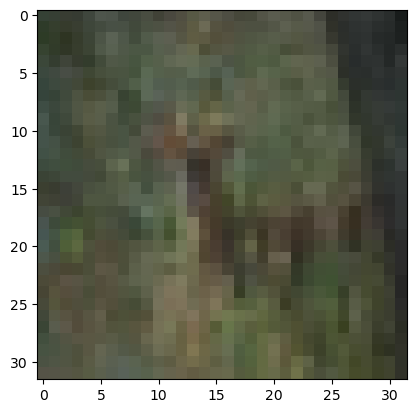

In [318]:
plt.imshow(image.permute(1, 2, 0).numpy());

Создадим загрузчик (генератор пакетов):

In [319]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

Повторим для тестовых данных:

In [320]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


Список классов:

In [321]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

нейронка:

In [322]:
# import torch.nn.functional as F

# hidden_dim = 128

# class Net(nn.Module):
#     def __init__(self, input_dim, output_dim,  l_n=[hidden_dim * 4, hidden_dim * 2, hidden_dim * 1 ]):
#         super().__init__()
#         self.fc1 = nn.Linear(input_dim, l_n[0])
#         self.fc2 = nn.Linear(l_n[0], l_n[1])
#         self.fc3 = nn.Linear(l_n[1], l_n[-1])
#         self.fc4 = nn.Linear(l_n[-1], output_dim)

#     def forward(self, x):
#         x = x.view(x.shape[0], -1)
#         x = self.fc1(x)
#         x = F.leaky_relu(x)
#         x = self.fc2(x)
#         x = F.leaky_relu(x)
#         x = self.fc3(x)
#         x = F.leaky_relu(x)
#         x = self.fc4(x)
#         return x
    
#     def predict(self, x):
#         x = x.view(x.shape[0], -1)
#         x = self.fc1(x)
#         x = F.leaky_relu(x)
#         x = self.fc2(x)
#         x = F.leaky_relu(x)
#         x = self.fc3(x)
#         x = F.leaky_relu(x)
#         x = self.fc4(x)
#         x = F.softmax(x)
#         return x

# h128 = 128
# net = Net(3072, 10, [h128*4, h128*2, h128])
# net.train()

In [323]:
import torch.nn.functional as F

hidden_dim = 128

class Net(nn.Module):
    def __init__(self, input_dim, output_dim,  l_n=[hidden_dim * 4, hidden_dim * 2, hidden_dim * 1 ]):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, l_n[0])
        self.fc2 = nn.Linear(l_n[0], l_n[1])
        self.fc3 = nn.Linear(l_n[1], l_n[-1])
        self.fc4 = nn.Linear(l_n[-1], output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x

h128 = 128
net = Net(3072, 10, [h128*4, h128*2, h128])
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)

In [324]:
3 * 32 * 32

3072

Потери и оптимизатор:

In [325]:
# базовый lr=0.01
# базовый lr=0.001

In [326]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.0)
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0)

цикл обучения:

In [327]:
# num_epochs = 5
# num_epochs = 15

In [345]:
num_epochs = 15

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0
    net.train()

    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f} : '+str(labels.shape[0]))
            running_loss, running_items = 0.0, 0.0
    net.eval()        
    for i, data in enumerate(test_loader):
        inputs, labels = data[0], data[1]
        yp = net.predict(inputs) 
        _, predicted = torch.max(yp, 1)
        print(labels , predicted )
        break

print('Training is finished!')

Epoch [1/15]. Step [1/782]. Loss: 0.019 : 64
Epoch [1/15]. Step [301/782]. Loss: 0.018 : 64
Epoch [1/15]. Step [601/782]. Loss: 0.018 : 64


C:\Users\Relict\AppData\Local\Temp\ipykernel_5016\173106317.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([3, 8, 8, 0, 6, 6, 1, 6]) tensor([3, 8, 8, 0, 4, 6, 5, 6])
Epoch [2/15]. Step [1/782]. Loss: 0.020 : 64
Epoch [2/15]. Step [301/782]. Loss: 0.018 : 64
Epoch [2/15]. Step [601/782]. Loss: 0.018 : 64
tensor([3, 8, 8, 0, 6, 6, 1, 6]) tensor([3, 8, 8, 8, 6, 6, 1, 6])
Epoch [3/15]. Step [1/782]. Loss: 0.024 : 64
Epoch [3/15]. Step [301/782]. Loss: 0.018 : 64
Epoch [3/15]. Step [601/782]. Loss: 0.018 : 64
tensor([3, 8, 8, 0, 6, 6, 1, 6]) tensor([3, 8, 8, 8, 4, 6, 1, 6])
Epoch [4/15]. Step [1/782]. Loss: 0.018 : 64
Epoch [4/15]. Step [301/782]. Loss: 0.017 : 64
Epoch [4/15]. Step [601/782]. Loss: 0.017 : 64
tensor([3, 8, 8, 0, 6, 6, 1, 6]) tensor([4, 8, 1, 0, 6, 6, 1, 6])
Epoch [5/15]. Step [1/782]. Loss: 0.016 : 64
Epoch [5/15]. Step [301/782]. Loss: 0.017 : 64
Epoch [5/15]. Step [601/782]. Loss: 0.017 : 64
tensor([3, 8, 8, 0, 6, 6, 1, 6]) tensor([4, 8, 0, 0, 4, 6, 1, 6])
Epoch [6/15]. Step [1/782]. Loss: 0.018 : 64
Epoch [6/15]. Step [301/782]. Loss: 0.017 : 64
Epoch [6/15]. Step [60

In [346]:
running_items

11536.0

In [347]:
labels.shape

torch.Size([8])

## Загрузка и сохранение модели

### Сохранение модели

In [331]:
PATH_WEIGHTS = './cifar_net_test_version_weights.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [332]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param, "\t", net.state_dict()[param].size())

Model state_dict: 
fc1.weight 	 torch.Size([512, 3072])
fc1.bias 	 torch.Size([512])
fc2.weight 	 torch.Size([256, 512])
fc2.bias 	 torch.Size([256])
fc3.weight 	 torch.Size([128, 256])
fc3.bias 	 torch.Size([128])
fc4.weight 	 torch.Size([10, 128])
fc4.bias 	 torch.Size([10])


In [333]:
PATH_MODEL = './cifar_net_test_version_model.pth'
torch.save(net, PATH_MODEL)

### Загрузка и использование модели 

In [334]:
net1 = Net(3072,  10)
net1.load_state_dict(torch.load(PATH_WEIGHTS))
net1

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)

In [335]:
net3 = torch.load(PATH_MODEL)

In [348]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

In [349]:
labels.shape

torch.Size([8])

In [350]:
images.max()

tensor(1.)

GroundTruth:  cat ship ship plane frog frog car frog


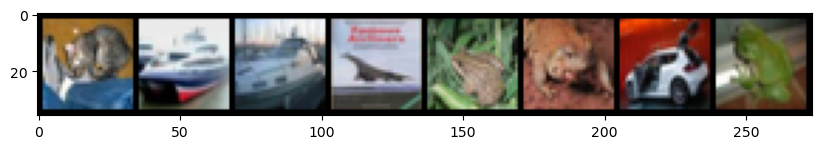

In [351]:
net3.eval()
outputs = net3(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [352]:
print(outputs)

tensor([[-3.1399, -1.0264, -1.9211,  2.4719,  1.9073,  0.7839, -2.2301, -2.8021,
          1.0379, -2.8847],
        [ 1.3224,  2.4914, -1.5843, -3.2909, -2.7641, -4.6815, -3.8017, -3.8008,
          4.5800,  2.6803],
        [ 2.1607,  1.3674, -0.6758, -3.1105, -0.7429, -2.7807, -5.6912, -2.8449,
          3.5453, -0.1520],
        [ 2.1648, -0.4061,  1.3231, -2.4061,  0.1122, -2.6228, -4.6960, -2.2779,
          2.9695, -0.2050],
        [-4.1003, -7.4563,  0.8245,  0.4802,  4.3047,  1.7942,  4.0993, -2.2233,
         -3.5055, -8.2830],
        [-1.9218, -2.8651,  0.1893,  1.0636,  0.2580,  0.5726,  3.0613, -1.1867,
         -4.1124, -2.2857],
        [-0.4540,  1.7139, -1.9040,  1.8982, -5.8275,  1.3486, -1.1419, -2.3438,
         -0.6036, -0.1636],
        [-2.9587, -3.1024,  1.0662,  0.8114,  0.3895,  0.3106,  2.5152, -1.4378,
         -2.9593, -1.8674]], grad_fn=<AddmmBackward0>)


In [353]:
net1.predict(images)

C:\Users\Relict\AppData\Local\Temp\ipykernel_5016\173106317.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([[1.7766e-03, 1.4705e-02, 6.0108e-03, 4.8614e-01, 2.7641e-01, 8.9887e-02,
         4.4128e-03, 2.4907e-03, 1.1588e-01, 2.2930e-03],
        [2.9248e-02, 9.4147e-02, 1.5987e-03, 2.9013e-04, 4.9133e-04, 7.2216e-05,
         1.7407e-04, 1.7424e-04, 7.6008e-01, 1.1373e-01],
        [1.7614e-01, 7.9672e-02, 1.0327e-02, 9.0488e-04, 9.6565e-03, 1.2584e-03,
         6.8521e-05, 1.1802e-03, 7.0336e-01, 1.7437e-02],
        [2.5019e-01, 1.9131e-02, 1.0783e-01, 2.5890e-03, 3.2124e-02, 2.0848e-03,
         2.6222e-04, 2.9432e-03, 5.5945e-01, 2.3392e-02],
        [1.1472e-04, 4.0007e-06, 1.5792e-02, 1.1192e-02, 5.1275e-01, 4.1649e-02,
         4.1754e-01, 7.4956e-04, 2.0796e-04, 1.7504e-06],
        [5.0200e-03, 1.9543e-03, 4.1448e-02, 9.9360e-02, 4.4396e-02, 6.0811e-02,
         7.3249e-01, 1.0470e-02, 5.6145e-04, 3.4884e-03],
        [3.4006e-02, 2.9722e-01, 7.9769e-03, 3.5738e-01, 1.5773e-04, 2.0628e-01,
         1.7093e-02, 5.1385e-03, 2.9282e-02, 4.5467e-02],
        [2.4819e-03, 2.1498

In [354]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 8, 8, 8, 4, 6, 3, 6])

In [355]:
print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  cat ship ship ship deer frog cat frog


In [356]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'ship' 'ship' 'deer' 'frog' 'cat' 'frog']
Accuracy is 0.625


# Домашнее задание

1. Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;
- *преобразование данных transform
- *Загрузим датасет CIFAR-100, сразу же создадим dataloader для него

2. *Переписать данный туториал на PyTorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

### Вывод: смена оптимизатора SGD на Adam повысило точность нейронной сети до 0,5 при прочих равных параметрах. Увеличение num_epochs до 15 повысило точность до 0,625 (точность предсказаний 5 из 8). Уменьшение hidden_dim более 128 и менее 128, также отрицательно сказалось на точности сети.

**Дополнительные материалы:**
1. Метод обратного распространения ошибки https://youtu.be/EuhoXsuu8SQ
2. Функции активаций https://youtu.be/Gs8T_qF-FAA

In [ ]:
train_dataset_1 = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)
